<a href="https://colab.research.google.com/github/NULabTMN/homework-1-relevance-judgments-yangdongfang0819/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This exercise starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [3]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2024-10-15 22:39:46--  https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz [following]
--2024-10-15 22:39:46--  https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz [following]
--2024-10-15 22:39:47--  https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

We convert this file with one JSON record on each line to a list of dictionaries.

In [4]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [5]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [6]:
# TODO: Print the 10 terms from document APW_ENG_20100101.0001 with the highest count.
# Helper function
def get_terms_by_doc_id(doc_id):
    return [term for term in terms if term['id'] == doc_id]

# Fetch terms
doc_id = 'APW_ENG_20100101.0001'
doc_terms = get_terms_by_doc_id(doc_id)

# Sort terms and select top 10
top_10_terms = sorted(doc_terms, key=lambda x: x['count'], reverse=True)[:10]

# Print top 10 terms with counts
print(f"Top 10 terms from document {doc_id}:")
for term in top_10_terms:
    print(f"Term: {term['term']}, Count: {term['count']}")

Top 10 terms from document APW_ENG_20100101.0001:
Term: a, Count: 16
Term: the, Count: 11
Term: and, Count: 10
Term: brooks, Count: 10
Term: of, Count: 10
Term: to, Count: 10
Term: he, Count: 9
Term: in, Count: 9
Term: gomez, Count: 8
Term: for, Count: 6


In [7]:
# TODO: Print the 10 terms with the highest total count in the corpus.
from collections import defaultdict

# Aggregate total count for each term across the entire corpus
term_counts = defaultdict(int)

for term in terms:
    term_counts[term['term']] += term['count']

# Sort terms by their total count
sorted_term_counts = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Print top 10 terms
print("Top 10 terms in the corpus by total count:")
for term, count in sorted_term_counts[:10]:
    print(f"Term: {term}, Total Count: {count}")

Top 10 terms in the corpus by total count:
Term: the, Total Count: 62216
Term: to, Total Count: 26931
Term: in, Total Count: 25659
Term: a, Total Count: 23383
Term: of, Total Count: 22326
Term: and, Total Count: 22125
Term: said, Total Count: 10888
Term: for, Total Count: 9716
Term: on, Total Count: 9382
Term: that, Total Count: 8942


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [8]:
# TODO: Compute the number of distinct documents in the collection.
N = 0

# Use a set to gather document IDs
distinct_docs = set(term['id'] for term in terms)

# Get count
N = len(distinct_docs)

# Print number of distinct documents
print(f"Number of distinct documents in the collection: {N}")

Number of distinct documents in the collection: 2778


In [9]:
# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df = dict()
from collections import defaultdict

# Initialize dictionary with default value as a set
df = defaultdict(set)

# Populate dictionary
for term in terms:
    df[term['term']].add(term['id'])

# Convert sets
df = {term: len(doc_ids) for term, doc_ids in df.items()}

# Print sample of dictionary (first 10 terms)
print("Sample of document frequencies (df):")
for term, count in list(df.items())[:10]:
    print(f"Term: {term}, Document Count: {count}")

Sample of document frequencies (df):
Term: a, Document Count: 2571
Term: about, Document Count: 1077
Term: abuse, Document Count: 26
Term: academy, Document Count: 20
Term: accused, Document Count: 201
Term: actress, Document Count: 23
Term: ad, Document Count: 16
Term: after, Document Count: 1484
Term: agenda, Document Count: 16
Term: agreed, Document Count: 163


In [10]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
# Assuming 'df' is the dictionary from the previous TODO and 'N' is the total number of distinct documents

# Get number of documents that contain the term 'the'
documents_with_the = df.get('the', 0)

# Calculate relative document frequency
relative_df_the = documents_with_the / N

# Print result
print(f"Relative document frequency of 'the': {relative_df_the}")

Relative document frequency of 'the': 0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [11]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
tfidf_terms = None

import numpy as np

# Define function to calculate TF-IDF
def compute_tfidf(term_data, df, N):
    tfidf_terms = []

    for term in term_data:
        # Calculate TF
        tf = np.log(term['count'] + 1)

        # Calculate IDF
        idf = np.log(N / (df.get(term['term'], 1)))

        # Compute TF-IDF
        tfidf = tf * idf

        # Add TF-IDF to the term record
        term_with_tfidf = {**term, 'tfidf': tfidf}
        tfidf_terms.append(term_with_tfidf)

    return tfidf_terms

# Compute TF-IDF values
tfidf_terms = compute_tfidf(terms, df, N)

# Print sample to verify (first 10 records)
print("Sample of TF-IDF values:")
for term in tfidf_terms[:10]:
    print(f"Term: {term['term']}, Document: {term['id']}, TF-IDF: {term['tfidf']:.4f}")

Sample of TF-IDF values:
Term: a, Document: APW_ENG_20100101.0001, TF-IDF: 0.2194
Term: about, Document: APW_ENG_20100101.0001, TF-IDF: 0.6568
Term: abuse, Document: APW_ENG_20100101.0001, TF-IDF: 3.2380
Term: academy, Document: APW_ENG_20100101.0001, TF-IDF: 3.4198
Term: accused, Document: APW_ENG_20100101.0001, TF-IDF: 2.8852
Term: actress, Document: APW_ENG_20100101.0001, TF-IDF: 3.3229
Term: ad, Document: APW_ENG_20100101.0001, TF-IDF: 3.5745
Term: after, Document: APW_ENG_20100101.0001, TF-IDF: 0.4346
Term: agenda, Document: APW_ENG_20100101.0001, TF-IDF: 3.5745
Term: agreed, Document: APW_ENG_20100101.0001, TF-IDF: 1.9656


In [12]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
# Sort terms by TF-IDF values in descending order
top_20_tfidf_terms = sorted(tfidf_terms, key=lambda x: x['tfidf'], reverse=True)[:20]

# Print top 20 term-document pairs with the highest TF-IDF values
print("Top 20 term-document pairs with the highest TF-IDF values:")
for term in top_20_tfidf_terms:
    print(f"Term: {term['term']}, Document: {term['id']}, TF-IDF: {term['tfidf']:.4f}")

Top 20 term-document pairs with the highest TF-IDF values:
Term: guarani, Document: APW_ENG_20100103.0028, TF-IDF: 23.2929
Term: nomination, Document: APW_ENG_20100105.0061, TF-IDF: 22.5194
Term: methane, Document: APW_ENG_20100105.0446, TF-IDF: 21.9852
Term: kheire, Document: APW_ENG_20100103.0015, TF-IDF: 21.4734
Term: greyhound, Document: APW_ENG_20100105.0014, TF-IDF: 21.4734
Term: shakespeare, Document: APW_ENG_20100107.0036, TF-IDF: 21.3070
Term: guild, Document: APW_ENG_20100105.0061, TF-IDF: 20.6675
Term: shakespeare, Document: APW_ENG_20100106.0428, TF-IDF: 20.5021
Term: elkhart, Document: APW_ENG_20100102.0197, TF-IDF: 20.3387
Term: magna, Document: APW_ENG_20100106.0075, TF-IDF: 20.3387
Term: sutton, Document: APW_ENG_20100106.1325, TF-IDF: 19.9209
Term: tohti, Document: APW_ENG_20100104.0043, TF-IDF: 19.7040
Term: greyhounds, Document: APW_ENG_20100105.0014, TF-IDF: 19.7040
Term: krewe, Document: APW_ENG_20100107.0018, TF-IDF: 19.7040
Term: minhas, Document: APW_ENG_2010010

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [13]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = []

from collections import defaultdict

# Aggregate total count for each term
frequency_dict = defaultdict(int)

for term in terms:
    frequency_dict[term['term']] += term['count']

# Sort terms by frequency in descending order
frequency = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Print most frequent term and others as sample to verify
print("Top 10 terms by frequency in the collection:")
for word, count in frequency[:10]:
    print(f"Word: {word}, Count: {count}")

Top 10 terms by frequency in the collection:
Word: the, Count: 62216
Word: to, Count: 26931
Word: in, Count: 25659
Word: a, Count: 23383
Word: of, Count: 22326
Word: and, Count: 22125
Word: said, Count: 10888
Word: for, Count: 9716
Word: on, Count: 9382
Word: that, Count: 8942


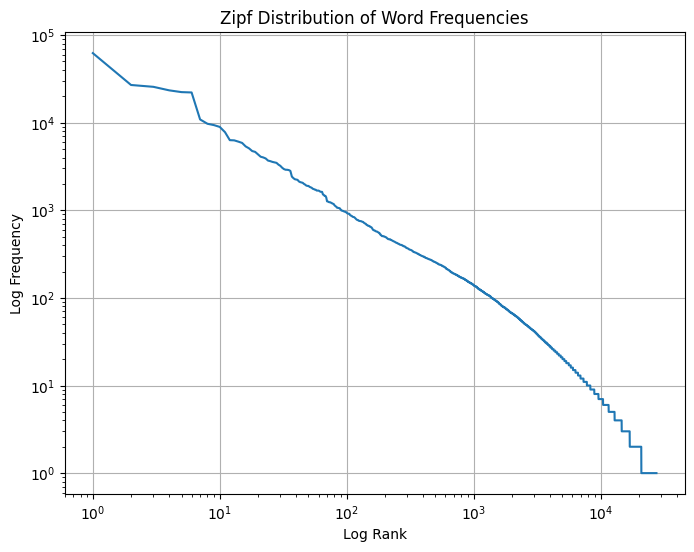

In [14]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
import matplotlib.pyplot as plt

import numpy as np

# Assuming 'frequency' is sorted list of (word, count) tuples

# Extract ranks and frequencies
ranks = np.arange(1, len(frequency) + 1)
frequencies = np.array([count for _, count in frequency])

# Plot log of the rank (x-axis) against log of the frequency (y-axis)
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies)
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf Distribution of Word Frequencies')
plt.grid(True)
plt.show()

In [15]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = 0

# Initialize counter for the total number of tokens
ntokens = sum(term['count'] for term in terms)

# Print total number
print(f"Total number of tokens in the corpus: {ntokens}")

Total number of tokens in the corpus: 1000000


In [16]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
# Assuming 'frequency' is sorted list of (word, count) tuples from the previous #TODO

# Calculate total number of tokens for the top 10 most frequent words
top_10_token_count = sum([count for _, count in frequency[:10]])

# Compute proportion of tokens
top_10_proportion = top_10_token_count / ntokens

# Print result
print(f"Proportion of tokens made up by the top 10 most frequent words: {top_10_proportion:.4f}")

Proportion of tokens made up by the top 10 most frequent words: 0.2216


In [17]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
# Calculate total number of tokens for words that occur exactly once
single_occurrence_tokens = sum(count for _, count in frequency if count == 1)

# Compute proportion of tokens
single_occurrence_proportion = single_occurrence_tokens / ntokens

# Print result
print(f"Proportion of tokens made up by words that occur exactly once: {single_occurrence_proportion:.4f}")

Proportion of tokens made up by words that occur exactly once: 0.0066


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the September 22, 1923, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-22/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of September, 1923, i.e., the issues with a date field that starts with `1923-09`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from September 1923. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [18]:
# TODO: Data acquisition code here.
import requests
import json
import time

# Fetch data for the Seattle Star issues
base_url = "https://chroniclingamerica.loc.gov/lccn/sn87093407.json"
response = requests.get(base_url)

# Check if request was successful
if response.status_code == 200:
    seattle_star_data = response.json()
    issues = seattle_star_data['issues']

# Filter issues from September 1923
    september_1923_issues = [issue for issue in issues if issue['date_issued'].startswith("1923-09")]

    print(f"Found {len(september_1923_issues)} issues from September 1923.")

    # Retrieve and extract text from each page
    for issue in september_1923_issues:
        issue_url = issue['url']
        print(f"Fetching issue: {issue_url}")

        # Fetch issue details to get pages
        issue_response = requests.get(f"{issue_url}/ocr.txt")

        if issue_response.status_code == 200:
            print(f"Successfully retrieved text from {issue_url}.")
            text_data = issue_response.text

            with open(f"seattle_star_{issue['date_issued']}.txt", "w", encoding='utf-8') as file:
                file.write(text_data)

        # Rate limit
        time.sleep(1)  # sleep for 1 second between requests
else:
    print("Failed to fetch the metadata for Seattle Star issues.")

Found 25 issues from September 1923.
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-01/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-03/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-04/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-05/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-06/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-07/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-08/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-10/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-11/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-12/ed-1.json
Fetching issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1923-09-13/ed-1.

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [19]:
# TODO: Tokenization code here.

import re
from collections import defaultdict

def clean_and_tokenize(text):
    # clean text (handle hyphenated line breaks)
    # Join the word correctly
    cleaned_text = re.sub(r"-\n", "", text)

    # Replace newlines with spaces
    cleaned_text = cleaned_text.replace("\n", " ")

    #Tokenize cleaned text (allowing only letters and numbers)
    tokens = re.findall(r"\b\w+\b", cleaned_text.lower())

    return tokens

def count_tokens(tokens):
    # Use dictionary to count the frequency of each token
    token_counts = defaultdict(int)
    for token in tokens:
        token_counts[token] += 1

    return token_counts

# Example:
# Assuming 'text_data' is the raw OCR text extracted from a document
text_data = """
The co-\noperation between the two departments was essential.
Despite the chal-\nlenges, they achieved success.
"""

# Tokenize text and count terms
tokens = clean_and_tokenize(text_data)
token_counts = count_tokens(tokens)

# Print resulting token counts
print("Token Counts:")
for token, count in token_counts.items():
    print(f"{token}: {count}")

Token Counts:
the: 3
cooperation: 1
between: 1
two: 1
departments: 1
was: 1
essential: 1
despite: 1
challenges: 1
they: 1
achieved: 1
success: 1


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

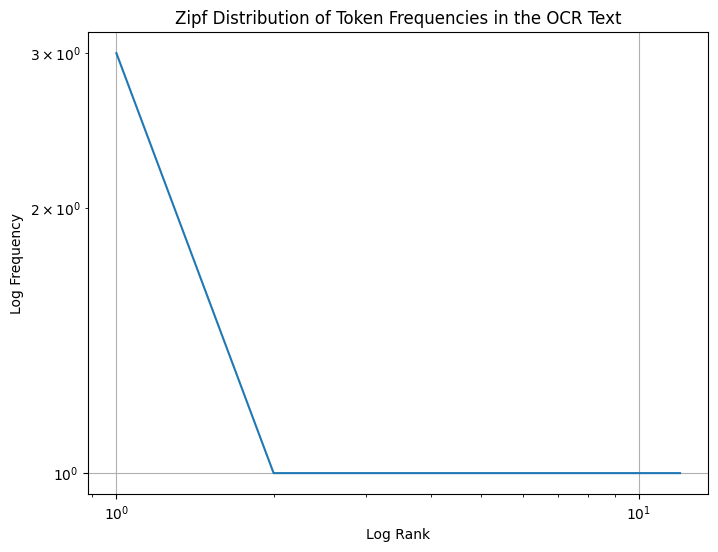

In [20]:
# TODO: Plotting code here.
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'token_counts' is the dictionary with token frequencies

# Convert token counts to a sorted list of (word, frequency) tuples
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Extract ranks and frequencies
ranks = np.arange(1, len(sorted_token_counts) + 1)
frequencies = np.array([count for _, count in sorted_token_counts])

# Plot log-log graph of rank vs. frequency
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies)
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf Distribution of Token Frequencies in the OCR Text')
plt.grid(True)
plt.show()

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.

When comparing the distributions of the Associated Press (AP) and Seattle Star collections, several differences can be observed. The AP dataset likely exhibits a more typical Zipf distribution, with a smooth linear relationship on a log-log plot, reflecting a mix of common and rare words. In contrast, the Seattle Star collection might show irregularities, such as spikes or dips, due to inconsistencies in word usage and noise introduced by OCR errors. High-frequency words, like function words ("the," "and," "of"), will dominate both datasets, but the exact counts could vary. Additionally, the Seattle Star may have a longer tail of rare words, resulting in a higher proportion of unique terms, often due to OCR misinterpretations or historical language variations.

These differences can be attributed to several factors. The Seattle Star data is derived from OCR processing of scanned historical newspapers, which can introduce errors, such as incorrect characters or fragmented words, leading to more noise or rare terms compared to the AP dataset. The historical context of the Seattle Star also means it includes older language styles, archaic phrases, and spelling variations that are less common today. In contrast, the AP dataset consists of modern, standardized reporting, leading to a more consistent language style and fewer unique or rare terms. Additionally, the process of digitizing historical newspapers can result in artifacts that affect tokenization, contributing to more single-occurrence words in the Seattle Star, while the AP data is processed directly from digital sources, resulting in cleaner tokenization.

Overall, the differences between the two distributions highlight how factors like data quality, historical language usage, and the nature of content can impact text analysis. The AP data reflects cleaner, modern language use, whereas the Seattle Star shows a more varied language distribution due to its historical context and the limitations of OCR, offering a richer but noisier dataset.